In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("cleaned_data.csv")

In [ ]:
data.dtypes

trending_date         object
channel_title         object
views                  int64
likes                  int64
dislikes               int64
comment_count          int64
comments_disabled     object
ratings_disabled      object
state                 object
lat                  float64
lon                  float64
geometry              object
Country               object
category_name         object
dtype: object

In [ ]:
filas_data = len(data)
filas_data

158700

In [ ]:
data[data['Country'] == 'MX']

,trending_date,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,Country,category_name,ratio_likes/dislikes,ratio_views/comments
79373,2017-11-14 06:00:00+00:00,MasterChef 2017,310130,4182,361,1836,FALSO,FALSO,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),MX,Entertainment,11.584488,168.916122
79374,2017-11-14 06:00:00+00:00,Micky Contreras Martinez,104972,271,174,369,FALSO,FALSO,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),MX,People & Blogs,1.557471,284.476965
79375,2017-11-14 06:00:00+00:00,El Pulso De La República,136064,10105,266,607,FALSO,FALSO,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398),MX,News & Politics,37.988722,224.158155
79376,2017-11-14 06:00:00+00:00,Casanare,96153,378,171,208,FALSO,FALSO,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418),MX,News & Politics,2.210526,462.274038
79377,2017-11-14 06:00:00+00:00,Musas,499965,57781,681,7428,FALSO,FALSO,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935),MX,Howto & Style,84.847283,67.308158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,2018-06-14 05:00:00+00:00,FPFutebolOficial,653114,65639,547,3826,FALSO,FALSO,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),MX,Sports,119.998172,170.704130
119524,2018-06-14 05:00:00+00:00,AMX,121674,3558,58,491,FALSO,FALSO,Veracruz,17.939976,-94.739990,POINT (-94.73999007 17.93997601),MX,News & Politics,61.344828,247.808554
119525,2018-06-14 05:00:00+00:00,Historias Wink,14067,538,6,90,FALSO,FALSO,Nuevo Leon,25.189999,-99.839989,POINT (-99.83998885 25.1899986),MX,Entertainment,89.666667,156.300000
119526,2018-06-14 05:00:00+00:00,Tele Time,22898,94,11,3,FALSO,FALSO,Baja California Sur,26.013333,-111.351664,POINT (-111.3516635 26.01333335),MX,People & Blogs,8.545455,7632.666667


#¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

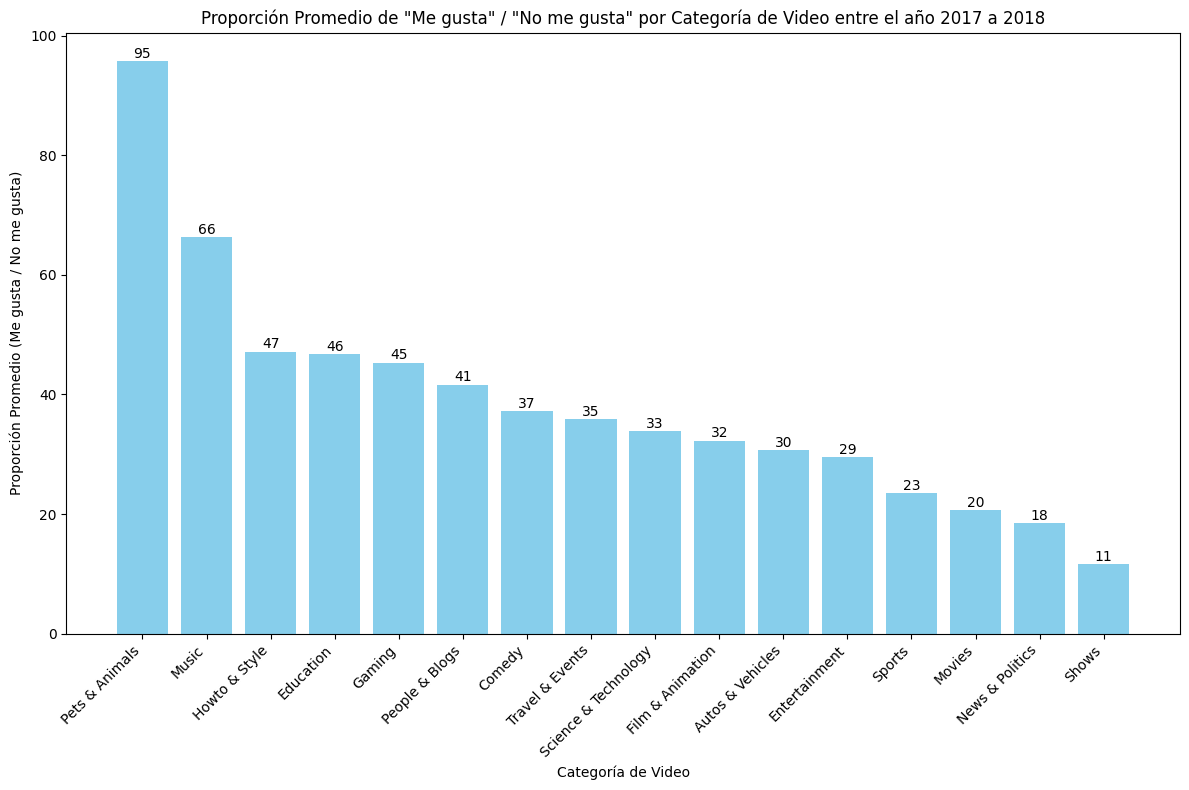

In [ ]:

data['ratio_likes/dislikes'] = data['likes'] / data['dislikes'].replace(0, np.nan)
category_ratios = data.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratios.index, category_ratios.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## INDIA

<ipython-input-82-0b085a7187c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['ratio_likes/dislikes'] = data_india['likes'] / data_india['dislikes'].replace(0, np.nan)


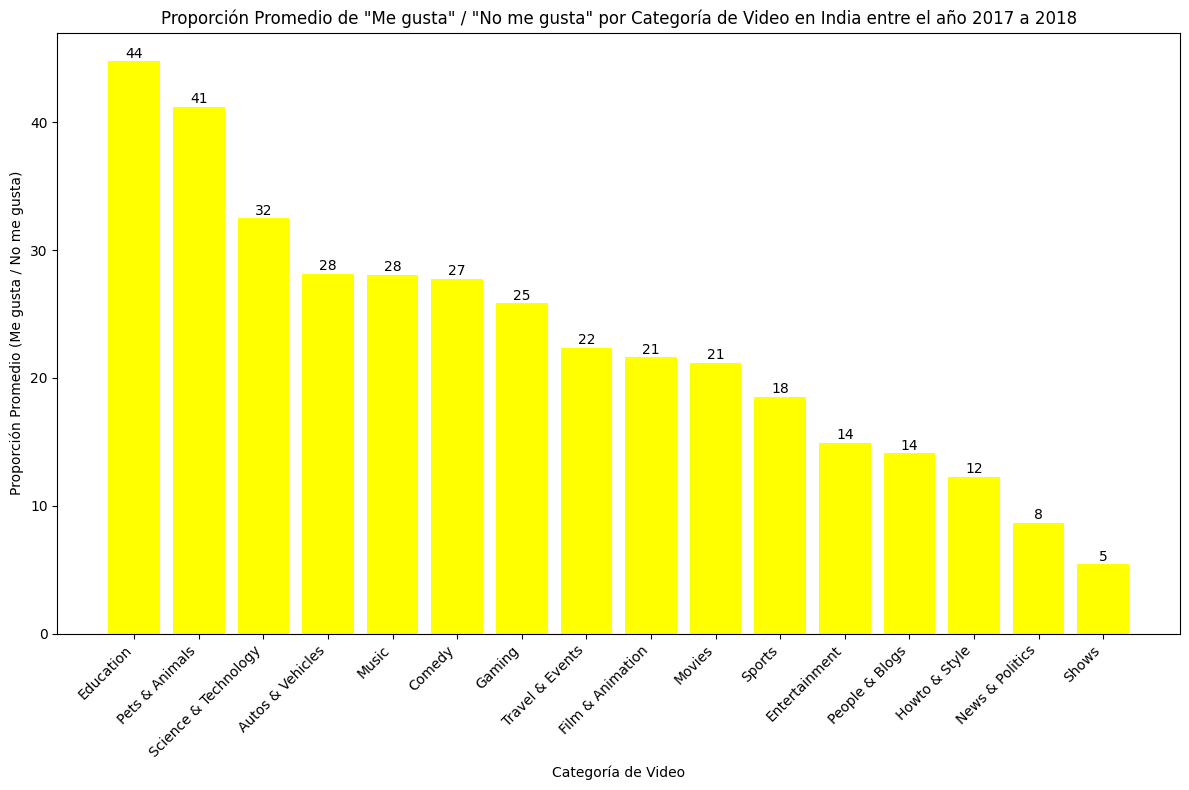

In [ ]:
data_india = data[data['Country'] == 'IN']
data_india['ratio_likes/dislikes'] = data_india['likes'] / data_india['dislikes'].replace(0, np.nan)
category_ratiosIN = data_india.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratiosIN.index, category_ratiosIN.values, color='yellow')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video en India entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## JAPON

<ipython-input-79-02bdc2498096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_japon['ratio_likes/dislikes'] = data_japon['likes'] / data_japon['dislikes'].replace(0, np.nan)


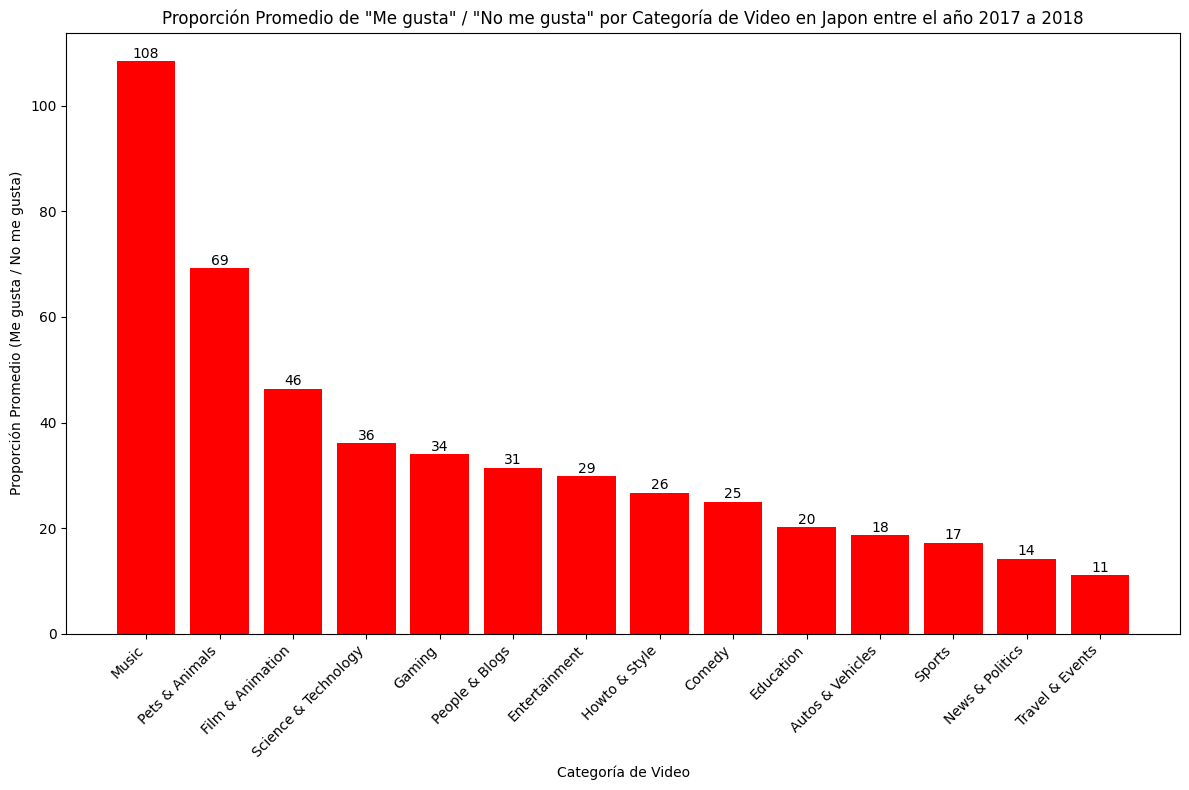

In [ ]:
data_japon = data[data['Country'] == 'JP']
data_japon['ratio_likes/dislikes'] = data_japon['likes'] / data_japon['dislikes'].replace(0, np.nan)
category_ratiosJP = data_japon.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratiosJP.index, category_ratiosJP.values, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video en Japon entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## COREA DEL SUR

<ipython-input-85-8102014a6372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corea['ratio_likes/dislikes'] = data_corea['likes'] / data_corea['dislikes'].replace(0, np.nan)


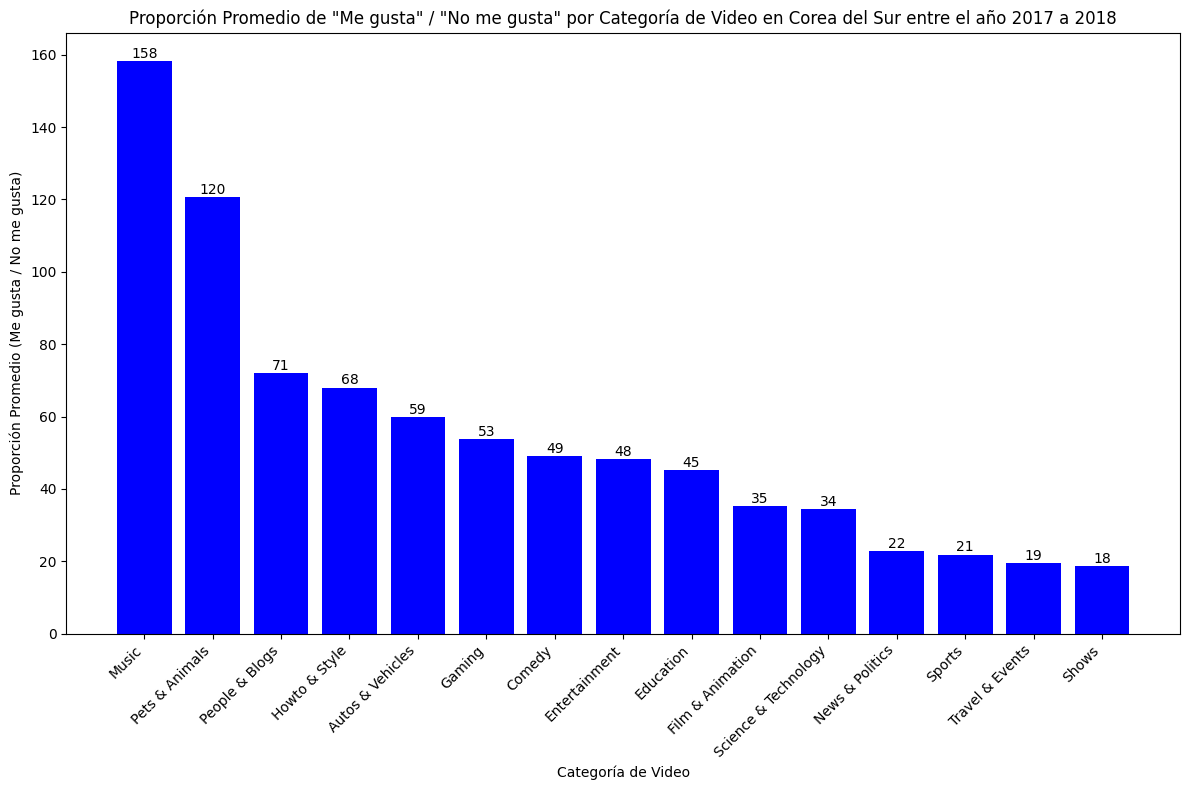

In [ ]:
data_corea = data[data['Country'] == 'KR']
data_corea['ratio_likes/dislikes'] = data_corea['likes'] / data_corea['dislikes'].replace(0, np.nan)
category_ratiosKR = data_corea.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratiosKR.index, category_ratiosKR.values, color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video en Corea del Sur entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## MEXICO

<ipython-input-86-85cf573eb371>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mexico['ratio_likes/dislikes'] = data_mexico['likes'] / data_mexico['dislikes'].replace(0, np.nan)


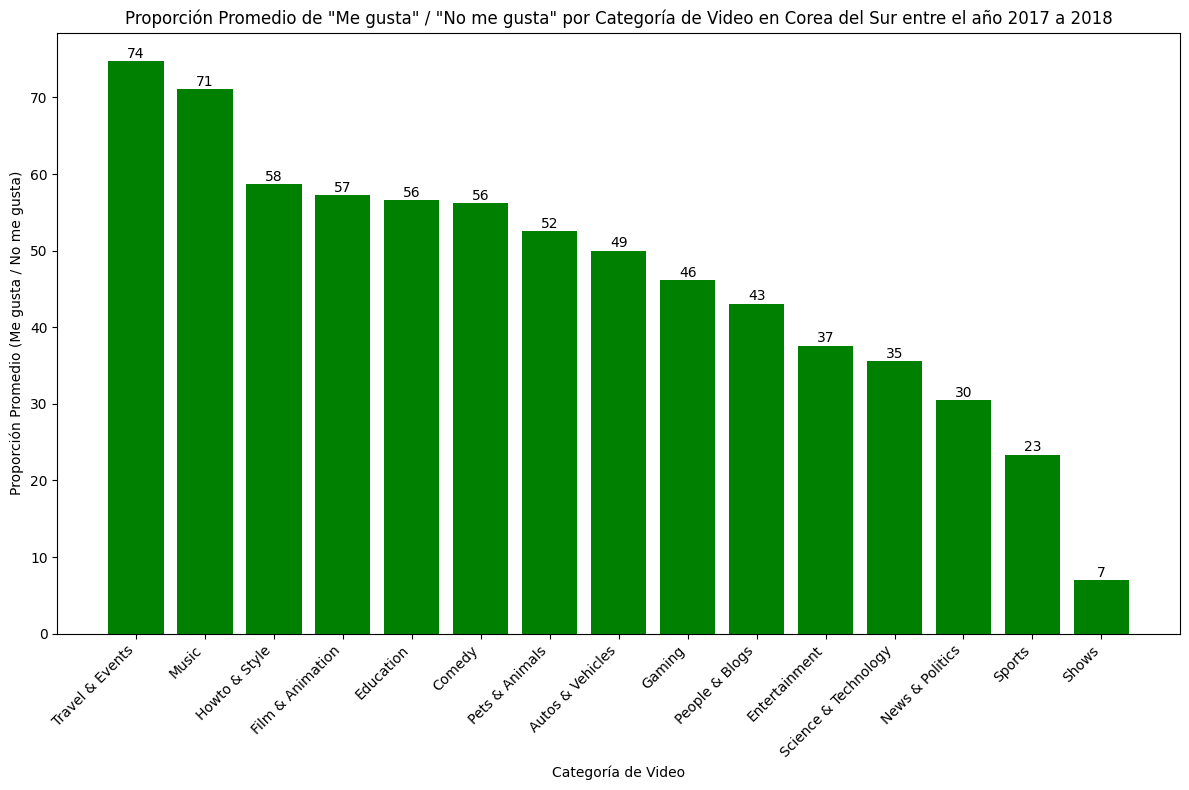

In [ ]:
data_mexico = data[data['Country'] == 'MX']
data_mexico['ratio_likes/dislikes'] = data_mexico['likes'] / data_mexico['dislikes'].replace(0, np.nan)
category_ratiosMX = data_mexico.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratiosMX.index, category_ratiosMX.values, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video en Corea del Sur entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## RUSIA

<ipython-input-87-ce644e17f81b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rusia['ratio_likes/dislikes'] = data_rusia['likes'] / data_rusia['dislikes'].replace(0, np.nan)


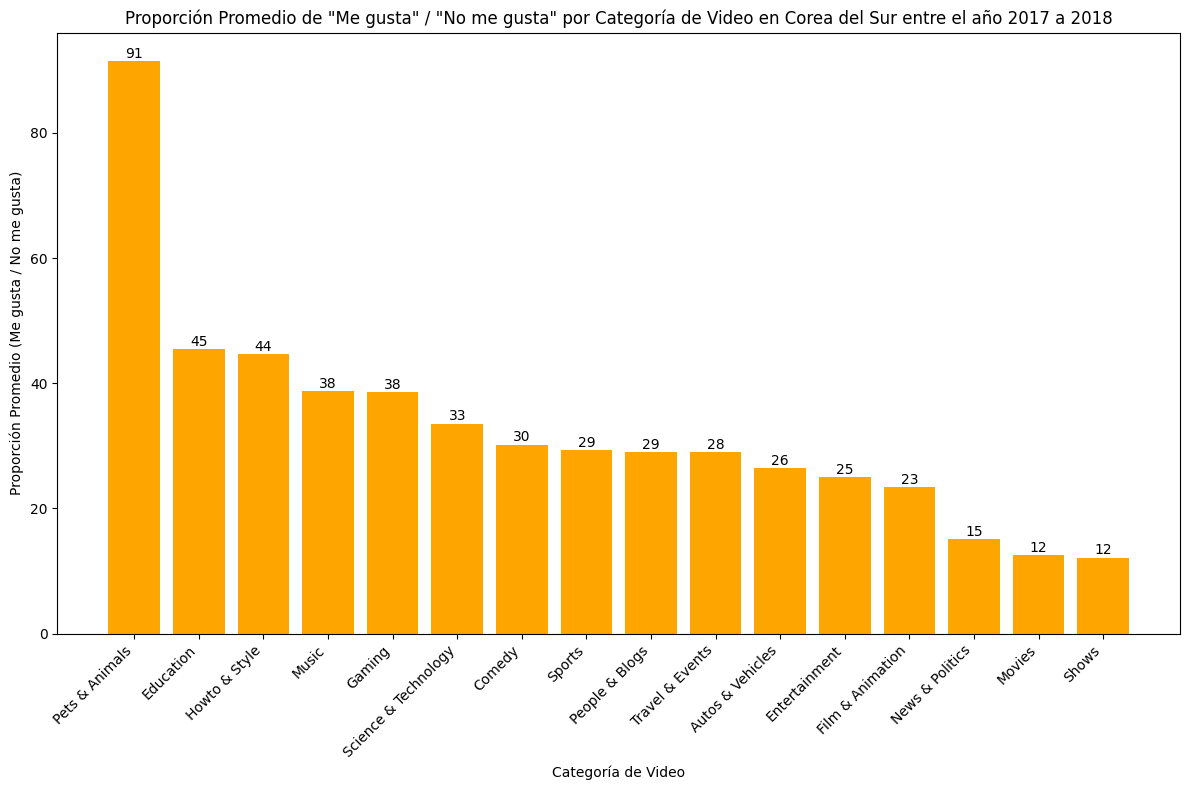

In [ ]:
data_rusia = data[data['Country'] == 'RU']
data_rusia['ratio_likes/dislikes'] = data_rusia['likes'] / data_rusia['dislikes'].replace(0, np.nan)
category_ratiosRU = data_rusia.groupby('category_name')['ratio_likes/dislikes'].mean().dropna().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(category_ratiosRU.index, category_ratiosRU.values, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Me gusta" / "No me gusta" por Categoría de Video en Corea del Sur entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Me gusta / No me gusta)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / "Comentarios"?

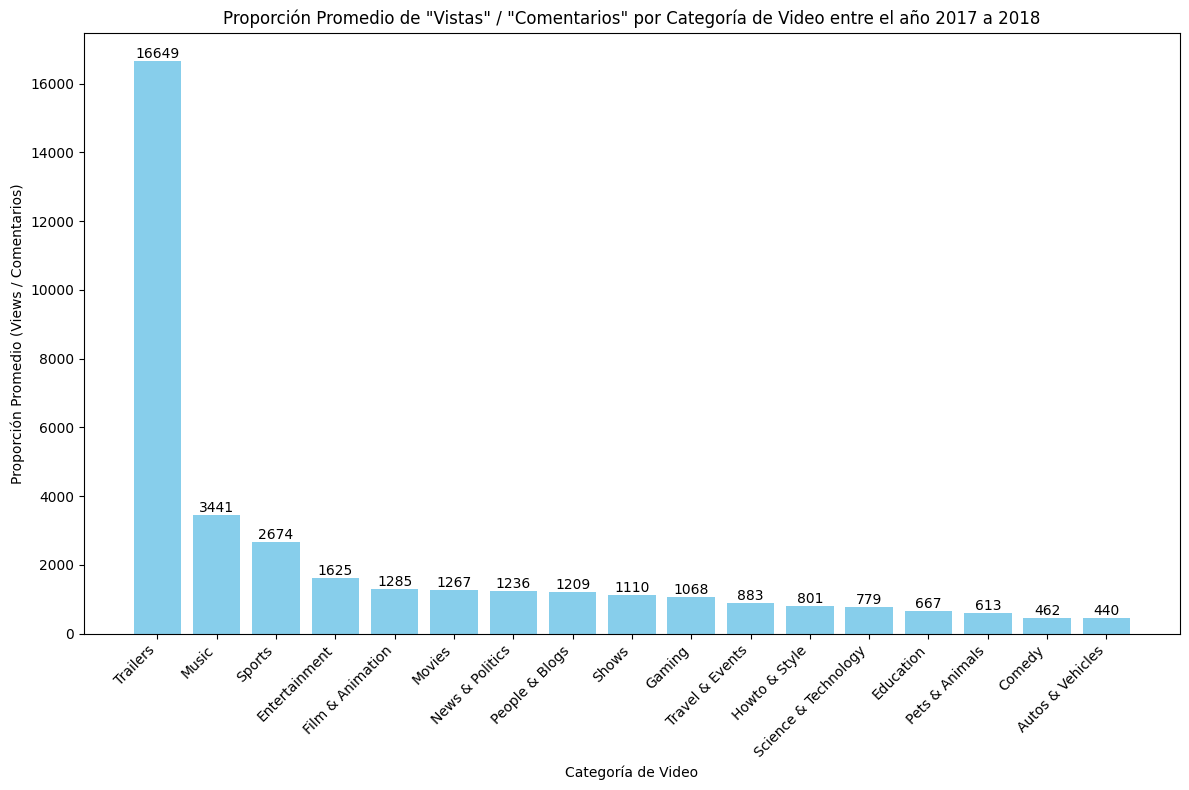

In [ ]:
data['ratio_views/comments'] = data['views'] / data['comment_count'].replace(0, np.nan)
comment_ratio = data.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratio.index, comment_ratio.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## INDIA

<ipython-input-91-4dc647994c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india2['ratio_views/comments'] = data_india2['views'] / data_india2['comment_count'].replace(0, np.nan)


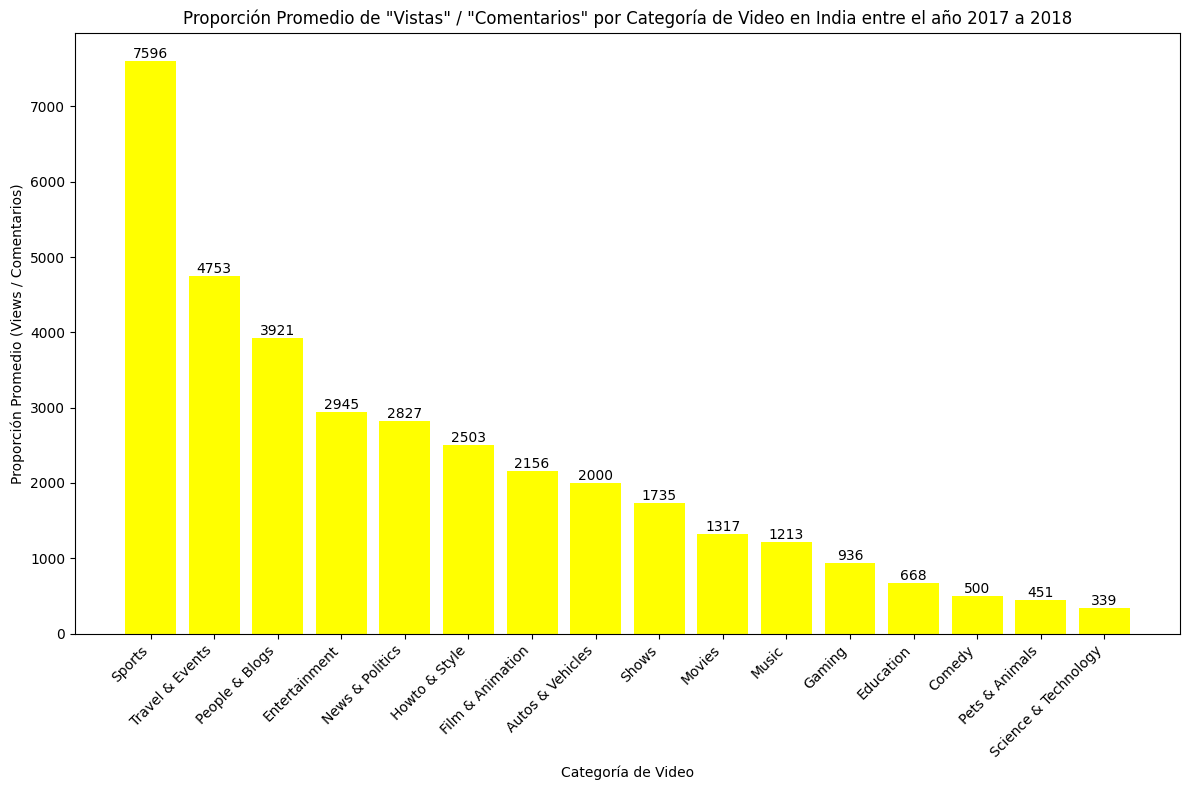

In [ ]:
data_india2 = data[data['Country'] == 'IN']
data_india2['ratio_views/comments'] = data_india2['views'] / data_india2['comment_count'].replace(0, np.nan)
comment_ratioIN2 = data_india2.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratioIN2.index, comment_ratioIN2.values, color='yellow')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video en India entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## JAPON

<ipython-input-90-1028a5ca381e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_japon2['ratio_views/comments'] = data_japon2['views'] / data_japon2['comment_count'].replace(0, np.nan)


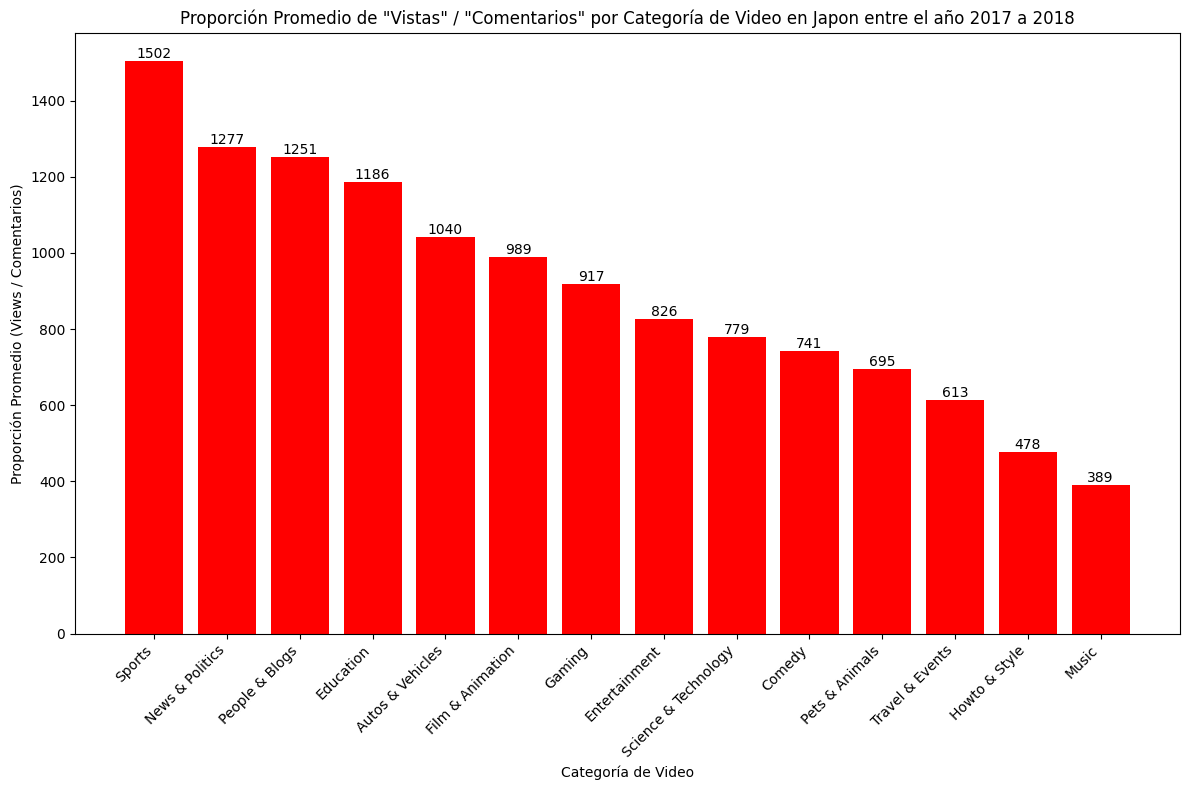

In [ ]:
data_japon2 = data[data['Country'] == 'JP']
data_japon2['ratio_views/comments'] = data_japon2['views'] / data_japon2['comment_count'].replace(0, np.nan)
comment_ratioJP2 = data_japon2.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratioJP2.index, comment_ratioJP2.values, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video en Japon entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## COREA DEL SUR

<ipython-input-93-015efbe4de27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corea2['ratio_views/comments'] = data_corea2['views'] / data_corea2['comment_count'].replace(0, np.nan)


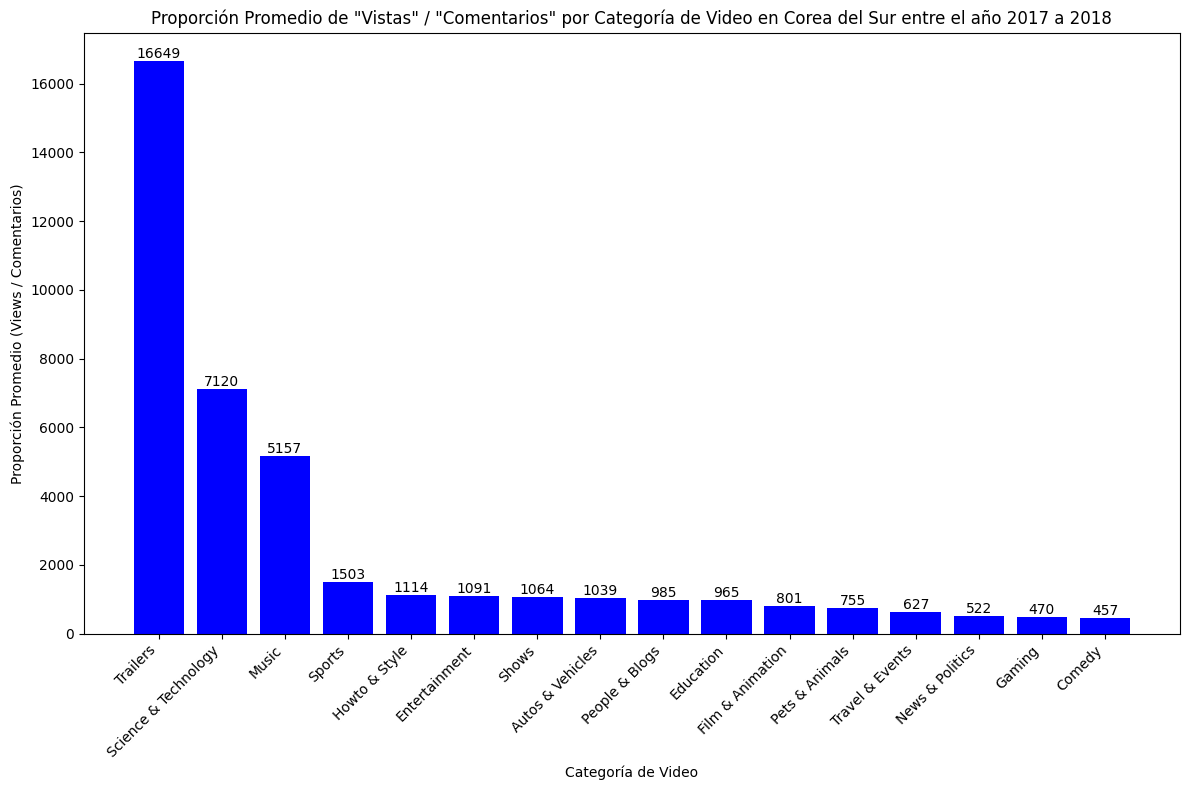

In [ ]:
data_corea2 = data[data['Country'] == 'KR']
data_corea2['ratio_views/comments'] = data_corea2['views'] / data_corea2['comment_count'].replace(0, np.nan)
comment_ratioKR2 = data_corea2.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratioKR2.index, comment_ratioKR2.values, color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video en Corea del Sur entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## MEXICO

<ipython-input-94-3571782b4148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mexico2['ratio_views/comments'] = data_mexico2['views'] / data_mexico2['comment_count'].replace(0, np.nan)


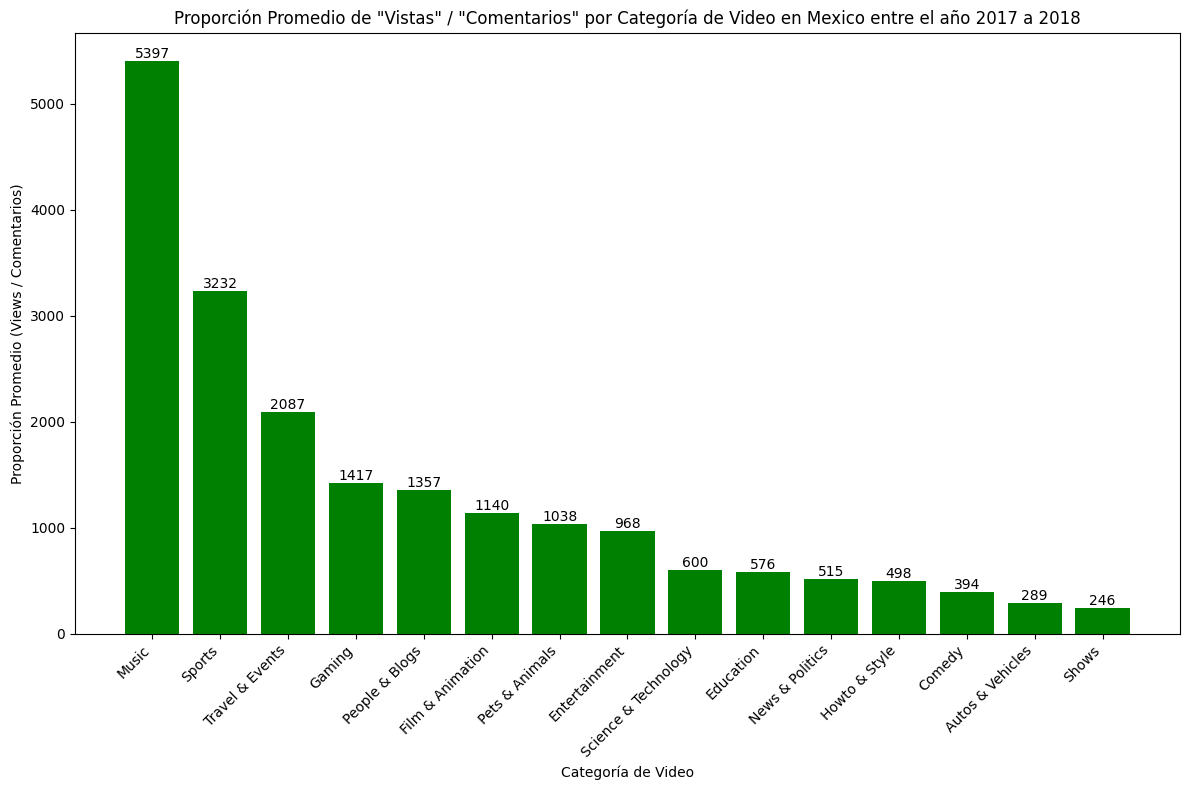

In [ ]:
data_mexico2 = data[data['Country'] == 'MX']
data_mexico2['ratio_views/comments'] = data_mexico2['views'] / data_mexico2['comment_count'].replace(0, np.nan)
comment_ratioMX2 = data_mexico2.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratioMX2.index, comment_ratioMX2.values, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video en Mexico entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## RUSIA

<ipython-input-96-a4074e6b3c7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rusia2['ratio_views/comments'] = data_rusia2['views'] / data_rusia2['comment_count'].replace(0, np.nan)


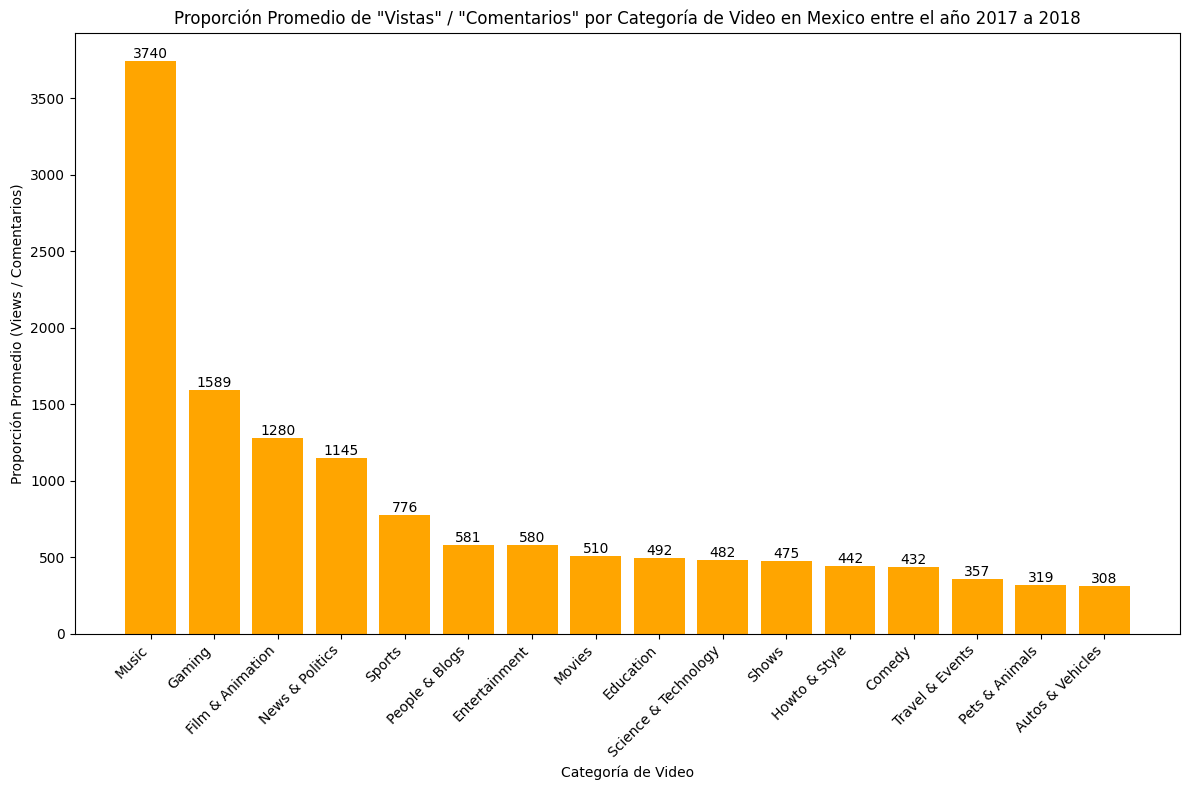

In [ ]:
data_rusia2 = data[data['Country'] == 'RU']
data_rusia2['ratio_views/comments'] = data_rusia2['views'] / data_rusia2['comment_count'].replace(0, np.nan)
comment_ratioRU2 = data_rusia2.groupby('category_name')['ratio_views/comments'].mean().sort_values(ascending=False)

#plt.figure(figsize=(12, 8))
#category_ratios.plot(kind='bar', color='skyblue')
plt.figure(figsize=(12, 8))
bars = plt.bar(comment_ratioRU2.index, comment_ratioRU2.values, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(round(yval, 2)), ha='center', va='bottom')

plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría de Video en Mexico entre el año 2017 a 2018')
plt.xlabel('Categoría de Video')
plt.ylabel('Proporción Promedio (Views / Comentarios)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()